In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense , Dropout
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import datetime

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
'''
與資料庫中NBA_BasicData資料內容相同
'''
df_all= pd.read_excel(r"C:/Users/user/NBA預測/20221217/predictdata2.xlsx",index_col='Matchtime')
df_all

,Home,HomeScore,Away,AwayScore,讓分,總分,Eventcode_x,主勝(初),客勝(初),主勝率(初),...,Away_starters5_BLK,Away_starters5_TOV,Away_starters5_PF,Away_starters5_PTS,Away_starters5_Game_Score,Away_starters5_+/-,Away_starters5_noplay_PointDiff,客隊ELO,主隊ELO,win
Matchtime,,,,,,,,,,,,,,,,,,,,,
2014-11-08,BOS,101,IND,98,5.5,191.0,188660,1.53,2.45,61.56,...,0.5,0.0,0.8,1.9,4.3,3.70,-8.2,2260.7834,1913.6297,1
2014-11-08,PHO,112,SAC,114,5.0,208.5,188656,1.50,2.51,62.63,...,1.3,0.2,1.3,1.8,15.4,10.45,-3.9,2135.9266,2242.1006,0
2014-11-08,UTA,82,DAL,105,-2.5,205.5,188655,2.17,1.65,43.24,...,0.4,0.1,1.4,1.8,4.5,2.69,6.6,2291.4406,2025.0647,0
2014-11-09,IND,90,WAS,97,-3.5,183.5,188666,2.33,1.59,40.60,...,0.0,0.3,1.0,1.1,3.9,3.29,3.8,1917.9272,2176.3828,0
2014-11-09,MIA,102,MIN,92,7.5,205.0,188667,1.32,3.35,71.53,...,0.6,0.5,2.3,2.1,27.5,20.63,0.8,1655.0025,2190.3275,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-27,CHI,124,IND,109,7.5,232.5,484626,1.30,3.46,72.59,...,0.9,0.3,0.6,4.0,13.5,11.03,6.9,2073.5579,2273.7394,1
2022-10-27,MIN,134,SAS,122,9.5,235.5,484627,1.25,3.90,75.65,...,0.8,0.7,2.2,3.1,11.6,9.00,-7.0,2174.4054,2159.1749,1
2022-10-27,UTA,109,HOU,101,8.5,232.5,484628,1.44,2.79,65.93,...,1.0,0.1,1.2,3.9,9.0,6.84,-10.3,1847.6334,2331.7889,1


In [ ]:
df_all.columns.values

In [4]:
df_x = df_all.drop(['Home', 'HomeScore', 'Away', 'AwayScore',"Eventcode_x","Eventcode_y","win"],axis = 1)
df_y = df_all["win"]
df_x.shape,df_y.shape

((7357, 561), (7357,))

In [4]:
df_train_x = df_x[:"2021-09"]
df_test_x = df_x["2021-10":]
df_train_y = df_y[:"2021-09"]
df_test_y = df_y["2021-10":]

In [5]:
x_train, x_val, y_train, y_val = train_test_split(df_train_x, df_train_y, test_size = 0.2, random_state = 777)

In [6]:
from sklearn.preprocessing import StandardScaler
mixmin_scaler = preprocessing.StandardScaler()
df_x_train_mm = mixmin_scaler.fit_transform(x_train)
df_x_val_mm = mixmin_scaler.transform(x_val)
x_test_mm = mixmin_scaler.transform(df_test_x)

In [134]:
import joblib

In [135]:
#joblib.dump( mixmin_scaler.fit(x_train), r"C:\Users\user\NBA預測\20221217\20230112\nba_flaml_74%_scaler2.model")

['C:\\Users\\user\\NBA預測\\20221217\\20230112\\nba_flaml_74%_scaler.model']

In [7]:
m = 10
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
#apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=f_classif, k=5)
fit = bestfeatures.fit(df_x_train_mm,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(m,'Score'))  #print 5 best features

                        Specs       Score
10                     主勝率(終)  898.170766
11                     客勝率(終)  898.065160
0                          讓分  887.690256
5                      客勝率(初)  851.264397
4                      主勝率(初)  851.261659
329  Home_starters1_PointDiff  768.927046
352  Home_starters2_PointDiff  764.895589
375  Home_starters3_PointDiff  746.037310
398  Home_starters4_PointDiff  741.103128
421  Home_starters5_PointDiff  733.430369


In [ ]:
from flaml import AutoML
clf = AutoML()
automl_settings = {
    "time_budget": 1,  # in seconds
    "metric": 'r2',
    "task": 'regression',
    "log_file_name": "california.log",
    "ensemble" : True,
    "time_budget" : 600
}

clf.fit(X_train = df_x_train_mm, y_train = y_train,
        X_val = df_x_val_mm,y_val = y_val,
        **automl_settings)

[flaml.automl: 01-12 15:30:14] {2600} INFO - task = regression
[flaml.automl: 01-12 15:30:14] {2602} INFO - Data split method: uniform
[flaml.automl: 01-12 15:30:14] {2605} INFO - Evaluation method: holdout
[flaml.automl: 01-12 15:30:14] {2727} INFO - Minimizing error metric: 1-r2
[flaml.automl: 01-12 15:30:14] {2869} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl: 01-12 15:30:14] {3164} INFO - iteration 0, current learner lgbm
[flaml.automl: 01-12 15:30:14] {3297} INFO - Estimated sufficient time budget=2361s. Estimated necessary time budget=17s.
[flaml.automl: 01-12 15:30:14] {3344} INFO -  at 0.6s,	estimator lgbm's best error=0.9707,	best estimator lgbm's best error=0.9707
[flaml.automl: 01-12 15:30:14] {3164} INFO - iteration 1, current learner lgbm
[flaml.automl: 01-12 15:30:14] {3344} INFO -  at 0.9s,	estimator lgbm's best error=0.9707,	best estimator lgbm's best error=0.9707
[flaml.automl: 01-12 15:30:14] {3164} 

[flaml.automl: 01-12 15:30:24] {3344} INFO -  at 10.1s,	estimator rf's best error=0.7880,	best estimator extra_tree's best error=0.7786
[flaml.automl: 01-12 15:30:24] {3164} INFO - iteration 36, current learner extra_tree
[flaml.automl: 01-12 15:30:24] {3344} INFO -  at 10.6s,	estimator extra_tree's best error=0.7786,	best estimator extra_tree's best error=0.7786
[flaml.automl: 01-12 15:30:24] {3164} INFO - iteration 37, current learner rf
[flaml.automl: 01-12 15:30:25] {3344} INFO -  at 12.0s,	estimator rf's best error=0.7880,	best estimator extra_tree's best error=0.7786
[flaml.automl: 01-12 15:30:25] {3164} INFO - iteration 38, current learner xgboost
[flaml.automl: 01-12 15:30:26] {3344} INFO -  at 12.1s,	estimator xgboost's best error=0.8726,	best estimator extra_tree's best error=0.7786
[flaml.automl: 01-12 15:30:26] {3164} INFO - iteration 39, current learner lgbm
[flaml.automl: 01-12 15:30:26] {3344} INFO -  at 12.3s,	estimator lgbm's best error=0.8120,	best estimator extra_tre

[flaml.automl: 01-12 15:30:38] {3344} INFO -  at 24.5s,	estimator extra_tree's best error=0.7751,	best estimator extra_tree's best error=0.7751
[flaml.automl: 01-12 15:30:38] {3164} INFO - iteration 73, current learner xgboost
[flaml.automl: 01-12 15:30:38] {3344} INFO -  at 24.7s,	estimator xgboost's best error=0.8678,	best estimator extra_tree's best error=0.7751
[flaml.automl: 01-12 15:30:38] {3164} INFO - iteration 74, current learner extra_tree
[flaml.automl: 01-12 15:30:41] {3344} INFO -  at 27.4s,	estimator extra_tree's best error=0.7751,	best estimator extra_tree's best error=0.7751
[flaml.automl: 01-12 15:30:41] {3164} INFO - iteration 75, current learner lgbm
[flaml.automl: 01-12 15:30:41] {3344} INFO -  at 27.7s,	estimator lgbm's best error=0.8120,	best estimator extra_tree's best error=0.7751
[flaml.automl: 01-12 15:30:41] {3164} INFO - iteration 76, current learner lgbm
[flaml.automl: 01-12 15:30:41] {3344} INFO -  at 28.0s,	estimator lgbm's best error=0.8120,	best estimat

[flaml.automl: 01-12 15:31:38] {3344} INFO -  at 84.9s,	estimator xgboost's best error=0.8678,	best estimator rf's best error=0.7667
[flaml.automl: 01-12 15:31:38] {3164} INFO - iteration 110, current learner lgbm
[flaml.automl: 01-12 15:31:39] {3344} INFO -  at 85.1s,	estimator lgbm's best error=0.8120,	best estimator rf's best error=0.7667
[flaml.automl: 01-12 15:31:39] {3164} INFO - iteration 111, current learner extra_tree
[flaml.automl: 01-12 15:31:40] {3344} INFO -  at 86.8s,	estimator extra_tree's best error=0.7730,	best estimator rf's best error=0.7667
[flaml.automl: 01-12 15:31:40] {3164} INFO - iteration 112, current learner xgboost
[flaml.automl: 01-12 15:31:40] {3344} INFO -  at 87.0s,	estimator xgboost's best error=0.8678,	best estimator rf's best error=0.7667
[flaml.automl: 01-12 15:31:40] {3164} INFO - iteration 113, current learner extra_tree
[flaml.automl: 01-12 15:31:42] {3344} INFO -  at 89.0s,	estimator extra_tree's best error=0.7730,	best estimator rf's best error=

[flaml.automl: 01-12 15:32:06] {3344} INFO -  at 112.8s,	estimator lgbm's best error=0.8095,	best estimator rf's best error=0.7667
[flaml.automl: 01-12 15:32:06] {3164} INFO - iteration 148, current learner lgbm
[flaml.automl: 01-12 15:32:06] {3344} INFO -  at 113.0s,	estimator lgbm's best error=0.8095,	best estimator rf's best error=0.7667
[flaml.automl: 01-12 15:32:06] {3164} INFO - iteration 149, current learner lgbm
[flaml.automl: 01-12 15:32:07] {3344} INFO -  at 113.2s,	estimator lgbm's best error=0.8095,	best estimator rf's best error=0.7667
[flaml.automl: 01-12 15:32:07] {3164} INFO - iteration 150, current learner lgbm
[flaml.automl: 01-12 15:32:07] {3344} INFO -  at 113.4s,	estimator lgbm's best error=0.8095,	best estimator rf's best error=0.7667
[flaml.automl: 01-12 15:32:07] {3164} INFO - iteration 151, current learner xgboost
[flaml.automl: 01-12 15:32:07] {3344} INFO -  at 113.6s,	estimator xgboost's best error=0.8678,	best estimator rf's best error=0.7667
[flaml.automl: 

In [8]:
import pickle

In [9]:
with open(r'C:\Users\user\NBA預測\20221217\20230112\nba_flaml_74%2.pkl', 'rb') as f:
    clf = pickle.load(f)

In [15]:
predicted = clf.predict(x_test_mm).flatten()
from sklearn.metrics import mean_squared_error, accuracy_score, average_precision_score
print('Prection loss (MSE):', mean_squared_error(
    df_test_y, predicted).round(2))
print('Prection accuracy:', accuracy_score(
    df_test_y, predicted).round(2))
print('Prection PR AUC:', average_precision_score(
    df_test_y, predicted).round(2))

Prection loss (MSE): 0.26
Prection accuracy: 0.74
Prection PR AUC: 0.71


In [137]:
# save model
#with open(r'C:\Users\user\NBA預測\20221217\20230112\nba_flaml_74%2.pkl', 'wb') as f:
#    pickle.dump(clf, f)

In [10]:
pre = []
pred = clf.predict_proba(x_test_mm)
for p in pred:
    pre.append(p[1])
pre

[0.9465937416563304,
 0.3676857575573659,
 0.4899441663742476,
 0.7592007773743513,
 0.036778434893681516,
 0.5604398568844742,
 0.3831053025165532,
 0.8144841175714064,
 0.08140330574481502,
 0.09886546736424304,
 0.5732682586777462,
 0.8483291482503645,
 0.9649565578578707,
 0.5825204068122858,
 0.9009429748669701,
 0.1129734951915934,
 0.7484668506468835,
 0.7606406163644738,
 0.8792160215408666,
 0.22097708122646917,
 0.4923384750711322,
 0.9913820395048859,
 0.7897628602902163,
 0.6165599737746684,
 0.8583931089711462,
 0.3250431343322634,
 0.615618154947514,
 0.8500076889513238,
 0.7547849257267183,
 0.9881454647344756,
 0.9446255693470241,
 0.9428197858237755,
 0.781114576313964,
 0.5678038268044714,
 0.8307636462744945,
 0.5228667546123413,
 0.5800240991601142,
 0.15955505570352804,
 0.8110067039331347,
 0.07135499954661906,
 0.6293599338312185,
 0.3676157550000698,
 0.8573796569970686,
 0.6093551293907236,
 0.6972678343475234,
 0.24490734306682702,
 0.8685550957711199,
 0.2451

In [13]:
def plot_roc_curve(fper, tper):
    auc_rate = auc(fper,tper)
    plt.figure(figsize=(10, 10),facecolor='white')
    plt.plot(fper, tper, color='red', label=f'ROC (AUC = {round(auc_rate,2)})')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

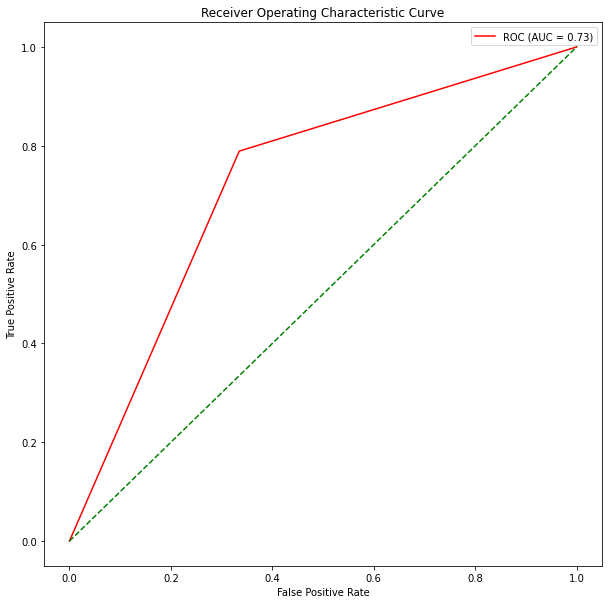

In [16]:
fper, tper, thresholds = roc_curve(df_test_y,predicted)
plot_roc_curve(fper, tper)

In [17]:
C2= confusion_matrix(df_test_y,predicted,labels=[1,0]) 
C2

array([[479, 128],
       [156, 310]], dtype=int64)

In [18]:
df_test = df_all["2021-10":]
df_test

,Home,HomeScore,Away,AwayScore,讓分,總分,Eventcode_x,主勝(初),客勝(初),主勝率(初),...,Away_starters5_BLK,Away_starters5_TOV,Away_starters5_PF,Away_starters5_PTS,Away_starters5_Game_Score,Away_starters5_+/-,Away_starters5_noplay_PointDiff,客隊ELO,主隊ELO,win
Matchtime,,,,,,,,,,,,,,,,,,,,,
2021-10-20,LAL,114,GSW,121,3.5,225.5,429689,1.52,2.52,62.35,...,0.4,0.5,0.6,2.9,7.2,10.49,3.0,2009.8350,2152.4730,0
2021-10-23,BOS,83,TOR,115,6.5,217.5,431010,1.37,3.09,69.20,...,0.3,0.9,0.8,1.1,6.7,5.50,-3.2,2038.2836,2120.5250,0
2021-10-23,CHI,128,NOP,112,6.5,223.5,431011,1.35,3.18,70.02,...,2.3,0.5,1.3,3.2,9.1,7.82,10.5,2199.0721,2237.0737,1
2021-10-23,DEN,102,SAS,96,7.5,222.5,431013,1.32,3.32,71.44,...,0.9,1.3,1.7,2.7,10.9,12.43,-10.8,1953.3545,2168.4805,1
2021-10-23,SAC,101,UTA,110,-6.5,227.5,431014,2.85,1.41,33.13,...,1.0,0.1,1.9,2.5,10.6,9.85,-1.1,2191.1674,1785.8385,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-27,CHI,124,IND,109,7.5,232.5,484626,1.30,3.46,72.59,...,0.9,0.3,0.6,4.0,13.5,11.03,6.9,2073.5579,2273.7394,1
2022-10-27,MIN,134,SAS,122,9.5,235.5,484627,1.25,3.90,75.65,...,0.8,0.7,2.2,3.1,11.6,9.00,-7.0,2174.4054,2159.1749,1
2022-10-27,UTA,109,HOU,101,8.5,232.5,484628,1.44,2.79,65.93,...,1.0,0.1,1.2,3.9,9.0,6.84,-10.3,1847.6334,2331.7889,1


In [19]:
df_s = df_test[['Home','HomeScore','Away','AwayScore','客勝(終)','主勝(終)','win']]
df_s

,Home,HomeScore,Away,AwayScore,客勝(終),主勝(終),win
Matchtime,,,,,,,
2021-10-20,LAL,114,GSW,121,2.30,1.62,0
2021-10-23,BOS,83,TOR,115,3.33,1.33,0
2021-10-23,CHI,128,NOP,112,3.10,1.37,1
2021-10-23,DEN,102,SAS,96,3.49,1.30,1
2021-10-23,SAC,101,UTA,110,1.38,3.03,0
...,...,...,...,...,...,...,...
2022-10-27,CHI,124,IND,109,3.33,1.33,1
2022-10-27,MIN,134,SAS,122,4.38,1.21,1
2022-10-27,UTA,109,HOU,101,3.72,1.28,1


In [20]:
df_s['predict'] = predicted 
df_s

C:\Users\user\AppData\Local\Temp/ipykernel_135668/141304865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s['predict'] = predicted


,Home,HomeScore,Away,AwayScore,客勝(終),主勝(終),win,predict
Matchtime,,,,,,,,
2021-10-20,LAL,114,GSW,121,2.30,1.62,0,1
2021-10-23,BOS,83,TOR,115,3.33,1.33,0,0
2021-10-23,CHI,128,NOP,112,3.10,1.37,1,0
2021-10-23,DEN,102,SAS,96,3.49,1.30,1,1
2021-10-23,SAC,101,UTA,110,1.38,3.03,0,0
...,...,...,...,...,...,...,...,...
2022-10-27,CHI,124,IND,109,3.33,1.33,1,0
2022-10-27,MIN,134,SAS,122,4.38,1.21,1,1
2022-10-27,UTA,109,HOU,101,3.72,1.28,1,1


In [21]:
df_s['predict'] = pre
df_s

C:\Users\user\AppData\Local\Temp/ipykernel_135668/1582062268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s['predict'] = pre


,Home,HomeScore,Away,AwayScore,客勝(終),主勝(終),win,predict
Matchtime,,,,,,,,
2021-10-20,LAL,114,GSW,121,2.30,1.62,0,0.946594
2021-10-23,BOS,83,TOR,115,3.33,1.33,0,0.367686
2021-10-23,CHI,128,NOP,112,3.10,1.37,1,0.489944
2021-10-23,DEN,102,SAS,96,3.49,1.30,1,0.759201
2021-10-23,SAC,101,UTA,110,1.38,3.03,0,0.036778
...,...,...,...,...,...,...,...,...
2022-10-27,CHI,124,IND,109,3.33,1.33,1,0.275564
2022-10-27,MIN,134,SAS,122,4.38,1.21,1,0.665643
2022-10-27,UTA,109,HOU,101,3.72,1.28,1,0.828764


In [22]:
df_s = df_s[df_s.index < '2022-09-01']
df_s

,Home,HomeScore,Away,AwayScore,客勝(終),主勝(終),win,predict
Matchtime,,,,,,,,
2021-10-20,LAL,114,GSW,121,2.30,1.62,0,0.946594
2021-10-23,BOS,83,TOR,115,3.33,1.33,0,0.367686
2021-10-23,CHI,128,NOP,112,3.10,1.37,1,0.489944
2021-10-23,DEN,102,SAS,96,3.49,1.30,1,0.759201
2021-10-23,SAC,101,UTA,110,1.38,3.03,0,0.036778
...,...,...,...,...,...,...,...,...
2022-06-06,GSW,107,BOS,88,2.64,1.49,1,0.254344
2022-06-09,BOS,116,GSW,100,2.26,1.64,1,0.993761
2022-06-11,BOS,97,GSW,107,2.37,1.59,0,0.995732


In [23]:
money_count = []
win_all = []
money = 0
for i in range(len(df_s)):
    wl = (df_s["predict"][i] >0.5)*1
    if wl == df_s["win"][i]:
        if df_s["predict"][i] > 0.5:
            win = 1000 * (df_s["主勝(終)"][i] - 1)
        elif df_s["predict"][i] < 0.5:
            win = 1000 * (df_s["客勝(終)"][i] - 1)
        else:
            win = 0
    else:
        if df_s["predict"][i] > 0.5 or df_s["predict"][i] < 0.5:
            win = -1000        
        else:
            win = 0
    money += win
    money_count.append(money)
    win_all.append(win)
money

212340.0

In [24]:
df_s["每筆獲利"] = win_all
df_s["累計獲利"] = money_count
df_s

C:\Users\user\AppData\Local\Temp/ipykernel_135668/298355816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s["每筆獲利"] = win_all
C:\Users\user\AppData\Local\Temp/ipykernel_135668/298355816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s["累計獲利"] = money_count


,Home,HomeScore,Away,AwayScore,客勝(終),主勝(終),win,predict,每筆獲利,累計獲利
Matchtime,,,,,,,,,,
2021-10-20,LAL,114,GSW,121,2.30,1.62,0,0.946594,-1000.0,-1000.0
2021-10-23,BOS,83,TOR,115,3.33,1.33,0,0.367686,2330.0,1330.0
2021-10-23,CHI,128,NOP,112,3.10,1.37,1,0.489944,-1000.0,330.0
2021-10-23,DEN,102,SAS,96,3.49,1.30,1,0.759201,300.0,630.0
2021-10-23,SAC,101,UTA,110,1.38,3.03,0,0.036778,380.0,1010.0
...,...,...,...,...,...,...,...,...,...,...
2022-06-06,GSW,107,BOS,88,2.64,1.49,1,0.254344,-1000.0,214700.0
2022-06-09,BOS,116,GSW,100,2.26,1.64,1,0.993761,640.0,215340.0
2022-06-11,BOS,97,GSW,107,2.37,1.59,0,0.995732,-1000.0,214340.0


In [25]:
s = df_s[df_s['每筆獲利'] != 0]
s

,Home,HomeScore,Away,AwayScore,客勝(終),主勝(終),win,predict,每筆獲利,累計獲利
Matchtime,,,,,,,,,,
2021-10-20,LAL,114,GSW,121,2.30,1.62,0,0.946594,-1000.0,-1000.0
2021-10-23,BOS,83,TOR,115,3.33,1.33,0,0.367686,2330.0,1330.0
2021-10-23,CHI,128,NOP,112,3.10,1.37,1,0.489944,-1000.0,330.0
2021-10-23,DEN,102,SAS,96,3.49,1.30,1,0.759201,300.0,630.0
2021-10-23,SAC,101,UTA,110,1.38,3.03,0,0.036778,380.0,1010.0
...,...,...,...,...,...,...,...,...,...,...
2022-06-06,GSW,107,BOS,88,2.64,1.49,1,0.254344,-1000.0,214700.0
2022-06-09,BOS,116,GSW,100,2.26,1.64,1,0.993761,640.0,215340.0
2022-06-11,BOS,97,GSW,107,2.37,1.59,0,0.995732,-1000.0,214340.0


In [26]:
w = 0
for i in range(len(s)):
    if s['win'][i] == 1 and s['predict'][i] > 0.5:
        w += 1
    elif s['win'][i] == 0 and s['predict'][i] < 0.5:
        w += 1
w / len(s)

0.740234375

In [27]:
odd = df_s.copy()

In [47]:
len(odd[odd["每筆獲利"] > 2000])

21

In [29]:
odd_profit = odd[odd["每筆獲利"] < 2000]
odd_profit[odd_profit["每筆獲利"] >= 1000]

,Home,HomeScore,Away,AwayScore,客勝(終),主勝(終),win,predict,每筆獲利,累計獲利
Matchtime,,,,,,,,,,
2021-10-28,BOS,107,WAS,116,2.46,1.57,0,0.220977,1460.0,5570.0
2021-10-28,MIL,108,MIN,113,2.96,1.40,0,0.492338,1960.0,7530.0
2021-10-29,WAS,122,ATL,111,1.57,2.44,1,0.616560,1440.0,8690.0
2021-11-01,CHO,125,POR,113,1.76,2.07,1,0.629360,1070.0,9980.0
2021-11-02,PHI,113,POR,103,1.79,2.06,1,0.697268,1060.0,10680.0
...,...,...,...,...,...,...,...,...,...,...
2022-04-24,MIN,119,MEM,118,1.72,2.14,1,0.503085,1140.0,225700.0
2022-04-25,DEN,126,GSW,121,1.49,2.62,1,0.638646,1620.0,227840.0
2022-05-04,MEM,106,GSW,101,1.78,2.06,1,0.982493,1060.0,224190.0


In [30]:
len(odd_profit[odd_profit["每筆獲利"] >= 1000])

113

In [31]:
odd_profit = odd[odd["每筆獲利"] < 1000]
o = odd_profit[odd_profit["每筆獲利"] >= 0]
o

,Home,HomeScore,Away,AwayScore,客勝(終),主勝(終),win,predict,每筆獲利,累計獲利
Matchtime,,,,,,,,,,
2021-10-23,DEN,102,SAS,96,3.49,1.30,1,0.759201,300.0,630.0
2021-10-23,SAC,101,UTA,110,1.38,3.03,0,0.036778,380.0,1010.0
2021-10-24,CHI,97,DET,82,3.81,1.27,1,0.560440,270.0,1280.0
2021-10-24,SAS,111,MIL,121,1.38,3.05,0,0.383105,380.0,1660.0
2021-10-25,SAC,107,GSW,119,1.63,2.27,0,0.098865,630.0,6710.0
...,...,...,...,...,...,...,...,...,...,...
2022-05-16,BOS,109,MIL,81,2.73,1.46,1,0.980411,460.0,221170.0
2022-05-20,MIA,102,BOS,127,1.98,1.84,0,0.343386,980.0,220150.0
2022-05-24,BOS,102,MIA,82,3.19,1.36,1,0.994034,360.0,217510.0


In [32]:
odd_profit = odd[odd["每筆獲利"] <0]
odd_profit

,Home,HomeScore,Away,AwayScore,客勝(終),主勝(終),win,predict,每筆獲利,累計獲利
Matchtime,,,,,,,,,,
2021-10-20,LAL,114,GSW,121,2.30,1.62,0,0.946594,-1000.0,-1000.0
2021-10-23,CHI,128,NOP,112,3.10,1.37,1,0.489944,-1000.0,330.0
2021-10-24,LAC,114,MEM,120,2.43,1.56,0,0.814484,-1000.0,660.0
2021-10-26,CHO,129,BOS,140,1.78,2.06,0,0.573268,-1000.0,5710.0
2021-10-26,DEN,87,CLE,99,4.88,1.18,0,0.582520,-1000.0,4940.0
...,...,...,...,...,...,...,...,...,...,...
2022-05-30,MIA,96,BOS,100,1.64,2.27,0,0.831767,-1000.0,214310.0
2022-06-06,GSW,107,BOS,88,2.64,1.49,1,0.254344,-1000.0,214700.0
2022-06-11,BOS,97,GSW,107,2.37,1.59,0,0.995732,-1000.0,214340.0


In [33]:
import numpy as np

In [34]:
o_last = odd[-1:]
o_max = np.argmax(odd["累計獲利"])
o_min = np.argmin(odd["累計獲利"])
show_max = int(round(odd["累計獲利"].max(),0))
show_min = int(round(odd["累計獲利"].min(),0))
show_last = int(round(o_last["累計獲利"],0))

In [35]:
o_max = odd[odd["累計獲利"] ==odd["累計獲利"].max()]
o_min = odd[odd["累計獲利"] ==odd["累計獲利"].min()]

o_min

,Home,HomeScore,Away,AwayScore,客勝(終),主勝(終),win,predict,每筆獲利,累計獲利
Matchtime,,,,,,,,,,
2021-10-20,LAL,114,GSW,121,2.3,1.62,0,0.946594,-1000.0,-1000.0


In [36]:
df_n_1 = odd.copy()

In [37]:
df_n_1.index = df_n_1.index.strftime("%Y-%m-%d")

In [38]:
df_2 = df_n_1.groupby("Matchtime")
for key,value in df_2:
    print(key)
    print(value)
    print(value["每筆獲利"].sum())
    print("\n")

2021-10-20
           Home  HomeScore Away  AwayScore  客勝(終)  主勝(終)  win   predict  \
Matchtime                                                                 
2021-10-20  LAL        114  GSW        121    2.3   1.62    0  0.946594   

              每筆獲利    累計獲利  
Matchtime                   
2021-10-20 -1000.0 -1000.0  
-1000.0


2021-10-23
           Home  HomeScore Away  AwayScore  客勝(終)  主勝(終)  win   predict  \
Matchtime                                                                 
2021-10-23  BOS         83  TOR        115   3.33   1.33    0  0.367686   
2021-10-23  CHI        128  NOP        112   3.10   1.37    1  0.489944   
2021-10-23  DEN        102  SAS         96   3.49   1.30    1  0.759201   
2021-10-23  SAC        101  UTA        110   1.38   3.03    0  0.036778   

              每筆獲利    累計獲利  
Matchtime                   
2021-10-23  2330.0  1330.0  
2021-10-23 -1000.0   330.0  
2021-10-23   300.0   630.0  
2021-10-23   380.0  1010.0  
2010.0


2021-10-24
          

           Home  HomeScore Away  AwayScore  客勝(終)  主勝(終)  win   predict  \
Matchtime                                                                 
2021-12-24  IND        118  HOU        106   3.23   1.35    1  0.692738   
2021-12-24  PHI         96  ATL         98   5.82   1.14    0  0.833605   
2021-12-24  MIA        115  DET        112   6.55   1.11    1  0.741362   
2021-12-24  NYK        117  WAS        124   2.16   1.70    0  0.529120   
2021-12-24  DAL         95  MIL        102   1.58   2.39    0  0.463915   
2021-12-24  UTA        128  MIN        116   9.12   1.06    1  0.886202   
2021-12-24  DEN        107  CHO        115   2.14   1.72    0  0.523146   
2021-12-24  GSW        113  MEM        104   2.78   1.44    1  0.872121   
2021-12-24  LAL        110  SAS        138   1.99   1.81    0  0.250286   

              每筆獲利     累計獲利  
Matchtime                    
2021-12-24   350.0  99390.0  
2021-12-24 -1000.0  98390.0  
2021-12-24   110.0  98500.0  
2021-12-24 -1000.0  9750

           Home  HomeScore Away  AwayScore  客勝(終)  主勝(終)  win   predict  \
Matchtime                                                                 
2022-03-03  CLE         98  CHO        119   2.48   1.54    0  0.478417   
2022-03-03  PHI        123  NYK        108   5.29   1.16    1  0.937267   
2022-03-03  MIL        120  MIA        119   2.52   1.53    1  0.862013   
2022-03-03  NOP        125  SAC         95   3.02   1.39    1  0.762263   
2022-03-03  HOU        127  UTA        132   1.06   9.22    0  0.040348   
2022-03-03  DEN        107  OKC        119   9.38   1.06    0  0.947011   

              每筆獲利      累計獲利  
Matchtime                     
2022-03-03  1480.0  171780.0  
2022-03-03   160.0  171940.0  
2022-03-03   530.0  172470.0  
2022-03-03   390.0  172860.0  
2022-03-03    60.0  172920.0  
2022-03-03 -1000.0  171920.0  
1620.0


2022-03-04
           Home  HomeScore Away  AwayScore  客勝(終)  主勝(終)  win   predict  \
Matchtime                                               

2022-05-14
           Home  HomeScore Away  AwayScore  客勝(終)  主勝(終)  win   predict  \
Matchtime                                                                 
2022-05-14  MIL         95  BOS        108   1.99   1.82    0  0.731366   
2022-05-14  GSW        110  MEM         96   3.88   1.26    1  0.312531   

              每筆獲利      累計獲利  
Matchtime                     
2022-05-14 -1000.0  221710.0  
2022-05-14 -1000.0  220710.0  
-2000.0


2022-05-16
           Home  HomeScore Away  AwayScore  客勝(終)  主勝(終)  win   predict  \
Matchtime                                                                 
2022-05-16  BOS        109  MIL         81   2.73   1.46    1  0.980411   

             每筆獲利      累計獲利  
Matchtime                    
2022-05-16  460.0  221170.0  
459.99999999999994


2022-05-18
           Home  HomeScore Away  AwayScore  客勝(終)  主勝(終)  win  predict  \
Matchtime                                                                
2022-05-18  MIA        118  BOS        107   2.

In [39]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.gridspec import GridSpec # 畫圖網格佈局
import datetime

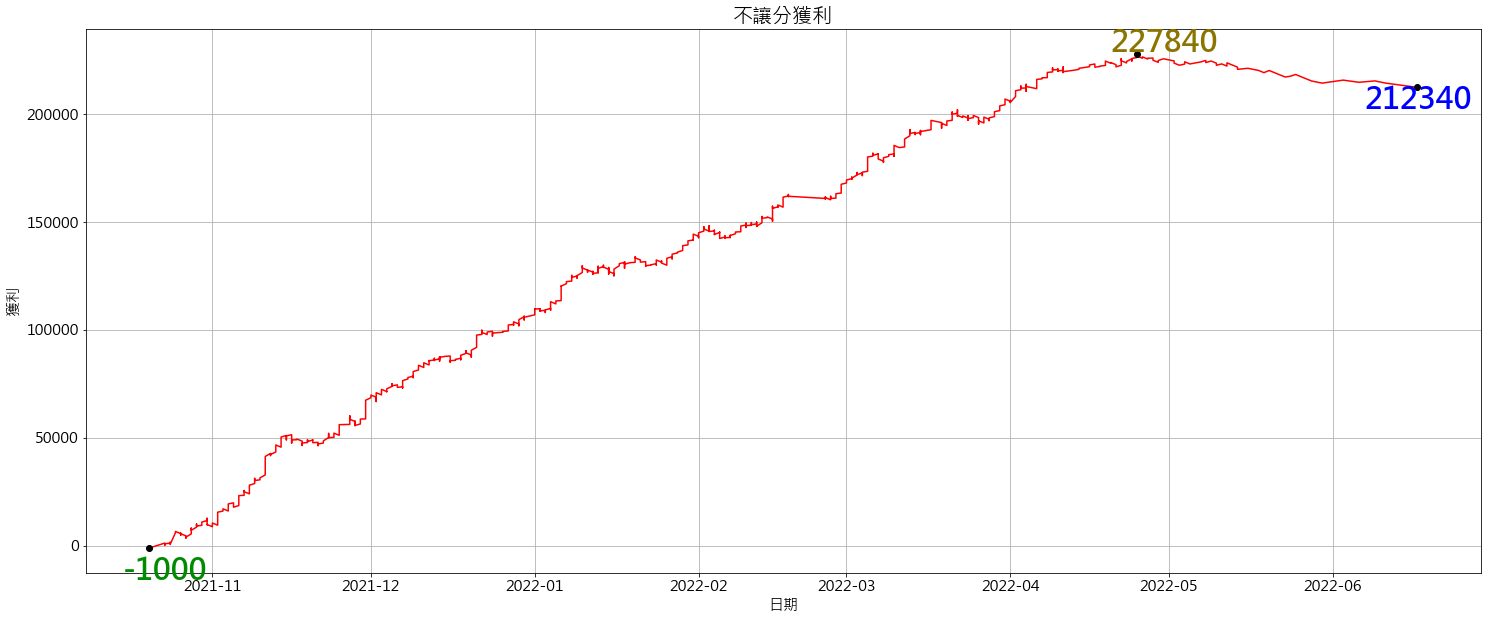

In [42]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
# 開新一個畫布 
fig = plt.figure(figsize=(25,10),facecolor='white') # 寬10 長8
gs = GridSpec(1, 1) # 設立1x1的網格

# 設定網格及子圖
ax = plt.subplot(gs[0, 0]) # 子圖ax在網格的[0, 0]

# 畫圖

ax.plot(odd.index,odd["累計獲利"],'r')
plt.plot(o_max.index[0],int(o_max["累計獲利"].iloc[0]),"ko")
plt.plot(o_min.index[0],int(round(o_min["累計獲利"].iloc[0],0)),"ko")
plt.plot(o_last.index[0],int(round(o_last["累計獲利"].iloc[0],0)),"ko")
plt.xlabel("日期",fontsize=15)
plt.ylabel("獲利",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("不讓分獲利",fontsize=20)
plt.annotate(show_max,xy=(o_max.index[0],int(o_max["累計獲利"].iloc[0])),xytext = (o_max.index[0]- datetime.timedelta(days = 5),int(o_max["累計獲利"].iloc[0])+1000),fontsize=30,color = '#8B7500', weight='bold')
plt.annotate(show_min,xy=(o_min.index[0],int(o_min["累計獲利"].iloc[0])),xytext = (o_min.index[0]- datetime.timedelta(days = 5),int(o_min["累計獲利"].iloc[0])-15000),fontsize=30,color = '#008B00', weight='bold')
plt.annotate(show_last,xy=(o_last.index[0],int(o_last["累計獲利"].iloc[0])),xytext = (o_last.index[0] - datetime.timedelta(days = 10),int(o_last["累計獲利"].iloc[0])-10000),fontsize=30,color = '#0000FF', weight='bold')
plt.grid()
# 圖調整
#tick_spacing = odd.index.size/5 # x軸密集度
#ax.xaxis.set_major_locator(mticker.MultipleLocator(tick_spacing))
plt.show()

In [43]:
odd_all = odd[odd['每筆獲利']!= 0]
odd_all

,Home,HomeScore,Away,AwayScore,客勝(終),主勝(終),win,predict,每筆獲利,累計獲利
Matchtime,,,,,,,,,,
2021-10-20,LAL,114,GSW,121,2.30,1.62,0,0.946594,-1000.0,-1000.0
2021-10-23,BOS,83,TOR,115,3.33,1.33,0,0.367686,2330.0,1330.0
2021-10-23,CHI,128,NOP,112,3.10,1.37,1,0.489944,-1000.0,330.0
2021-10-23,DEN,102,SAS,96,3.49,1.30,1,0.759201,300.0,630.0
2021-10-23,SAC,101,UTA,110,1.38,3.03,0,0.036778,380.0,1010.0
...,...,...,...,...,...,...,...,...,...,...
2022-06-06,GSW,107,BOS,88,2.64,1.49,1,0.254344,-1000.0,214700.0
2022-06-09,BOS,116,GSW,100,2.26,1.64,1,0.993761,640.0,215340.0
2022-06-11,BOS,97,GSW,107,2.37,1.59,0,0.995732,-1000.0,214340.0


In [44]:
odd_all['predict'] = (odd_all['predict'] > 0.5)*1

In [45]:
odd_all["每筆獲利"].mean()

207.36328125

In [46]:
odd_all[(odd_all["win"] == 1) & (odd_all["predict"] == 1)]["主勝(終)"].mean()

1.4945315904139431

In [95]:
odd_all[(odd_all["win"] == 0) & (odd_all["predict"] == 0)]["客勝(終)"].mean()

1.8406354515050176

In [96]:
odd_all[(odd_all["win"] == 1) & (odd_all["主勝(終)"] <= odd_all["客勝(終)"])]["主勝(終)"].mean()

1.3917787418655085

In [97]:
odd_all[(odd_all["win"] == 0) & (odd_all["主勝(終)"] >= odd_all["客勝(終)"])]["客勝(終)"].mean()

1.4988695652173922

In [48]:
df_mon = odd_all.copy()
df_mon.index = odd_all.index.strftime("%Y-%m-%d")

In [49]:
df_g = df_mon.groupby("Matchtime").sum()
date = df_g.index
win_all = []
count_all = []
count = []
rate = []
for i in date:
    group = df_mon[(df_mon.index == i) & (df_mon["每筆獲利"] != 0)]
    win = len(group [group["predict"] == group ["win"]])
    count.append(win)
    count_all.append(len(group))
    if win == 0:
        rate.append(0)
    else:
        rate_one = round((win / len(group))*100,2)
        rate.append(rate_one)
    win_over = len(group [group["每筆獲利"] >= 1000])
    win_all.append(win_over)
df_g["當日賽場數"] = count_all 
df_g["當日勝場數"] = count
df_g["當日獲利大於成本的場次"] = win_all
df_g["當日勝率"] = rate
df_g

,HomeScore,AwayScore,客勝(終),主勝(終),win,predict,每筆獲利,累計獲利,當日賽場數,當日勝場數,當日獲利大於成本的場次,當日勝率
Matchtime,,,,,,,,,,,,
2021-10-20,114,121,2.30,1.62,0,1,-1000.0,-1000.0,1,0,0,0.00
2021-10-23,414,433,11.30,7.03,2,1,2010.0,3300.0,4,3,1,75.00
2021-10-24,322,323,7.62,5.88,1,2,-350.0,3600.0,3,2,0,66.67
2021-10-25,211,229,8.05,3.39,0,0,6050.0,12790.0,2,2,1,100.00
2021-10-26,561,519,22.17,7.19,3,5,-1050.0,28050.0,5,3,0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-06,107,88,2.64,1.49,1,0,-1000.0,214700.0,1,0,0,0.00
2022-06-09,116,100,2.26,1.64,1,1,640.0,215340.0,1,1,0,100.00
2022-06-11,97,107,2.37,1.59,0,1,-1000.0,214340.0,1,0,0,0.00


In [50]:
len(df_g)

210

In [51]:
a = df_g[df_g["當日勝率"]>=50]
len(a) 

180

In [52]:
len(a) / len(df_g) 

0.8571428571428571

In [53]:
a = df_g[df_g["當日勝率"]>=50]
len(a[a["每筆獲利"] >0])

143

In [54]:
a = df_g[df_g["當日勝率"]>=50]
len(a[a["每筆獲利"] <0])

37

In [55]:
o_max = df_g[df_g["每筆獲利"] == df_g["每筆獲利"].max()]
o_min = df_g[df_g["每筆獲利"] == df_g["每筆獲利"].min()][:1]
show_max = int(round(df_g["每筆獲利"].max(),0))
show_min = int(round(df_g["每筆獲利"].min(),0))

In [56]:
o_max[["每筆獲利","當日賽場數","當日勝場數","當日勝率"]]

,每筆獲利,當日賽場數,當日勝場數,當日勝率
Matchtime,,,,
2021-11-11,9900.0,9,9,100.0


In [57]:
o_min[["每筆獲利","當日賽場數","當日勝場數","當日勝率"]]

,每筆獲利,當日賽場數,當日勝場數,當日勝率
Matchtime,,,,
2021-11-28,-2840.0,7,3,42.86


In [61]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import numpy as np

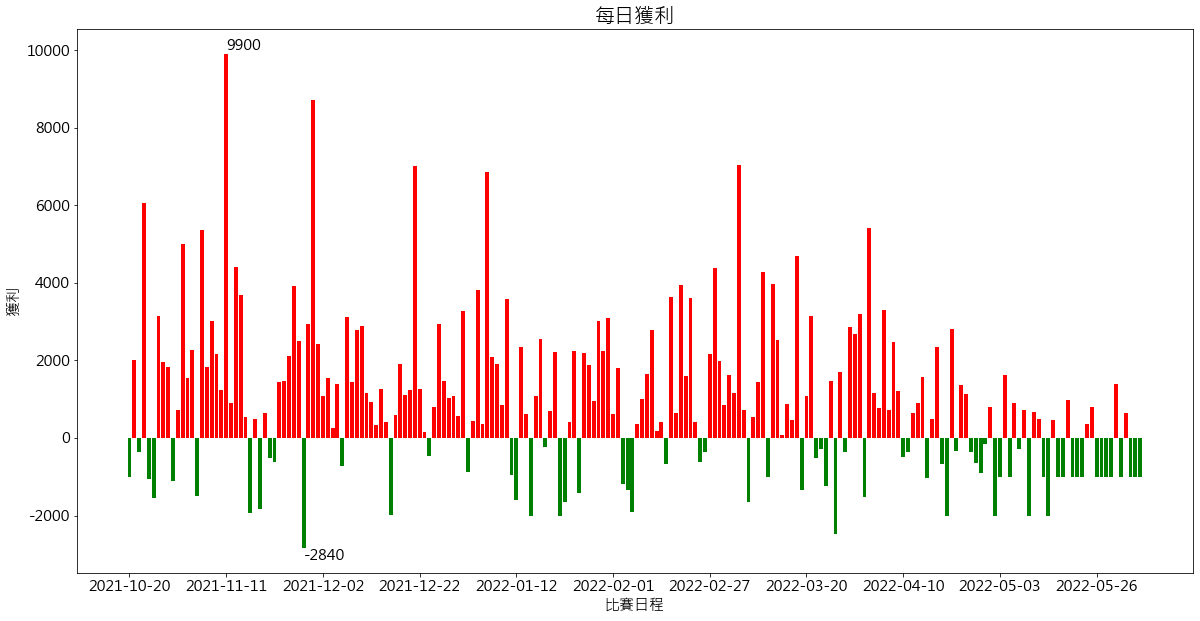

In [60]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(20,10),facecolor='white')
plt.bar(df_g.index,df_g["每筆獲利"],color= ["r" if df_g["每筆獲利"][i]>0 else "g"  for i in range(len(df_g))])
plt.xlabel("比賽日程", fontsize=15)
plt.ylabel("獲利", fontsize=15)
plt.title("每日獲利", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.annotate(show_max,xy=(o_max.index,int(o_max["每筆獲利"])),xytext = (o_max.index,int(o_max["每筆獲利"])+100),fontsize=15)
plt.annotate(show_min,xy=(o_min.index,int(o_min["每筆獲利"])),xytext = (o_min.index,int(o_min["每筆獲利"])-300),fontsize=15)
x_major_locator=MultipleLocator(20)
#把x轴的刻度间隔设置为1，并存在变量里
ax=plt.gca()
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
#把x轴的主刻度设置为1的倍数
plt.show()

In [62]:
from datetime import datetime

In [63]:
df_mon = odd_all.copy()

In [64]:
df_2 = df_mon.resample("W")
df_week = pd.DataFrame()
date = []
money = []
win_all = []
count_all = []
count = []
rate = []
for key,value in df_2:
    if len(value) != 0 :
        date.append(key)
        money.append(value["每筆獲利"].sum())
        count_all.append(len(value))
        win = value[value['每筆獲利'] > 0]
        count.append(len(win))
        win_over = value[value['每筆獲利'] > 1000]
        win_all.append(len(win_over))
        rate.append(round((len(win)/len(value))*100,2))
df_week.index = date
df_week['當周獲利'] = money
df_week["當周賽場數"] = count_all 
df_week["當周勝場數"] = count
df_week["當周獲利大於成本的場次"] = win_all
df_week["當周勝率"] = rate
df_week

,當周獲利,當周賽場數,當周勝場數,當周獲利大於成本的場次,當周勝率
2021-10-24,660.0,8,5,1,62.50
2021-10-31,9250.0,31,22,4,70.97
2021-11-07,15210.0,35,29,7,82.86
2021-11-14,25310.0,36,32,12,88.89
2021-11-21,-3230.0,41,26,1,63.41
2021-11-28,8610.0,39,30,6,76.92
2021-12-05,18320.0,40,31,11,77.50
2021-12-12,11610.0,40,32,4,80.00
2021-12-19,3660.0,35,24,4,68.57
2021-12-26,9980.0,31,24,5,77.42


In [65]:
len(df_week[df_week['當周獲利'] > 0])

27

In [66]:
len(df_week)

35

In [67]:
len(df_week[df_week['當周獲利'] > 0]) / len(df_week)

0.7714285714285715

In [68]:
df_week.index = df_week.index.astype(str)

In [69]:
o_max = df_week[df_week["當周獲利"] == df_week["當周獲利"].max()]
o_min = df_week[df_week["當周獲利"] == df_week["當周獲利"].min()]
show_max = int(round(df_week["當周獲利"].max(),0))
show_min = int(round(df_week["當周獲利"].min(),0))

In [70]:
o_max

,當周獲利,當周賽場數,當周勝場數,當周獲利大於成本的場次,當周勝率
2021-11-14,25310.0,36,32,12,88.89


In [71]:
o_min 

,當周獲利,當周賽場數,當周勝場數,當周獲利大於成本的場次,當周勝率
2021-11-21,-3230.0,41,26,1,63.41


In [72]:
import datetime

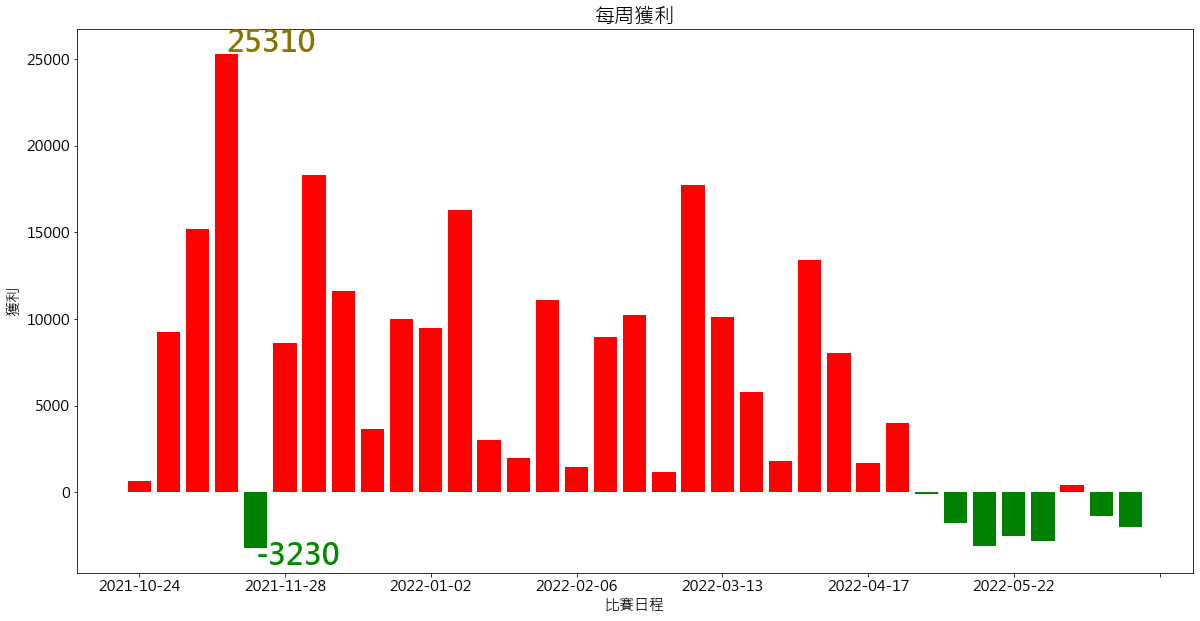

In [73]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(20,10),facecolor='white')
plt.bar(df_week.index,df_week["當周獲利"],color= ["r" if df_week["當周獲利"][i]>0 else "g"  for i in range(len(df_week))])
plt.xlabel("比賽日程", fontsize=15)
plt.ylabel("獲利", fontsize=15)
plt.title("每周獲利", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.annotate(show_max,xy=(o_max.index,int(o_max["當周獲利"])),xytext = (o_max.index,int(o_max["當周獲利"])+100),fontsize=30,color = '#8B7500', weight='bold')
plt.annotate(show_min,xy=(o_min.index,int(o_min["當周獲利"])),xytext = (o_min.index,int(o_min["當周獲利"])-1000),fontsize=30,color = '#008B00', weight='bold')
x_major_locator=MultipleLocator(5)
#把x轴的刻度间隔设置为1，并存在变量里
ax=plt.gca()
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
#把x轴的主刻度设置为1的倍数
plt.show()

In [74]:
mon = odd_all.copy()
df_mon.index = odd_all.index.strftime("%Y-%m")

In [75]:
df_g = df_mon .groupby("Matchtime").sum()
date = df_g.index
win_all = []
count_all = []
count = []
rate = []
for i in date:
    group = df_mon[(df_mon.index == i) & (df_mon["每筆獲利"] != 0)]
    win = len(group [group["predict"] == group ["win"]])
    count.append(win)
    count_all.append(len(group))
    if win == 0:
        rate.append(0)
    else:
        rate_one = round((win / len(group))*100,2)
        rate.append(rate_one)
    win_over = len(group [group["每筆獲利"] >= 1000])
    win_all.append(win_over)
df_g["當月賽場數"] = count_all 
df_g["當月勝場數"] = count
df_g["當月獲利大於成本的場次"] = win_all
df_g["當月勝率"] = rate
df_g

,HomeScore,AwayScore,客勝(終),主勝(終),win,predict,每筆獲利,累計獲利,當月賽場數,當月勝場數,當月獲利大於成本的場次,當月勝率
Matchtime,,,,,,,,,,,,
2021-10,4240,4090,124.25,62.33,22,28,9910.0,259000.0,39,27,5,69.23
2021-11,17997,17410,501.11,278.59,102,104,57550.0,6825320.0,164,130,31,79.27
2021-12,17568,17317,442.03,292.20,83,90,38980.0,13933320.0,160,119,23,74.38
2022-01,21077,20514,559.15,341.05,115,120,37950.0,23905250.0,189,140,26,74.07
2022-02,15363,15370,381.28,290.39,68,73,23080.0,20781070.0,137,100,13,72.99
2022-03,22056,21516,565.48,423.14,107,109,39470.0,36447880.0,192,150,20,78.12
2022-04,12085,11917,336.15,222.93,58,59,18640.0,23137470.0,106,79,14,74.53
2022-05,3360,3149,81.46,50.95,19,21,-11270.0,6853070.0,31,11,2,35.48
2022-06,622,612,14.47,9.47,3,3,-1970.0,1285760.0,6,2,1,33.33


In [76]:
o_max = df_g[df_g["每筆獲利"] == df_g["每筆獲利"].max()]
o_min = df_g[df_g["每筆獲利"] == df_g["每筆獲利"].min()]
show_max = int(round(df_g["每筆獲利"].max(),0))
show_min = int(round(df_g["每筆獲利"].min(),0))

In [77]:
d = df_g[["每筆獲利","當月賽場數","當月勝場數","當月獲利大於成本的場次","當月勝率"]]
d

,每筆獲利,當月賽場數,當月勝場數,當月獲利大於成本的場次,當月勝率
Matchtime,,,,,
2021-10,9910.0,39,27,5,69.23
2021-11,57550.0,164,130,31,79.27
2021-12,38980.0,160,119,23,74.38
2022-01,37950.0,189,140,26,74.07
2022-02,23080.0,137,100,13,72.99
2022-03,39470.0,192,150,20,78.12
2022-04,18640.0,106,79,14,74.53
2022-05,-11270.0,31,11,2,35.48
2022-06,-1970.0,6,2,1,33.33


In [78]:
round((d['當月勝場數'].sum() / d['當月賽場數'].sum())*100,2)

74.02

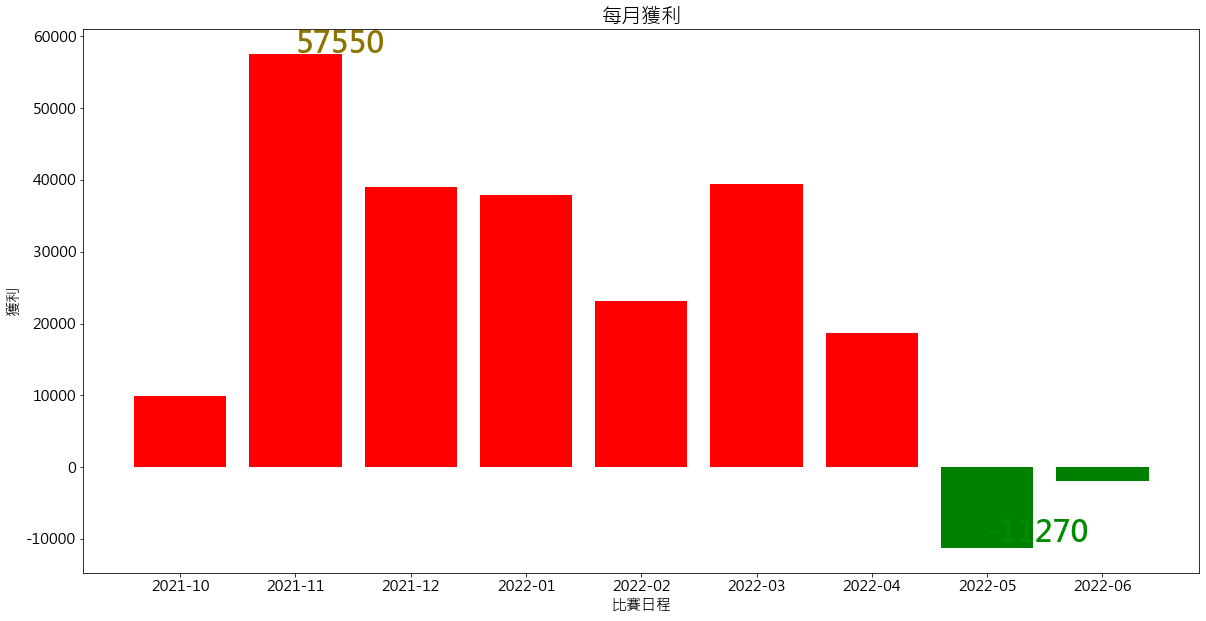

In [80]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(20,10),facecolor='white')
plt.bar(df_g.index,df_g["每筆獲利"],color= ["r" if df_g["每筆獲利"][i]>0 else "g"  for i in range(len(df_g))])
plt.xlabel("比賽日程", fontsize=15)
plt.ylabel("獲利", fontsize=15)
plt.title("每月獲利", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.annotate(show_max,xy=(o_max.index,int(o_max["每筆獲利"])),xytext = (o_max.index,int(o_max["每筆獲利"])+100),fontsize=30,color = '#8B7500', weight='bold')
plt.annotate(show_min,xy=(o_min.index,int(o_min["每筆獲利"])),xytext = (o_min.index,int(o_min["每筆獲利"])+800),fontsize=30,color = '#008B00', weight='bold')
#x_major_locator=MultipleLocator(20)
#把x轴的刻度间隔设置为1，并存在变量里
#ax=plt.gca()
#ax为两条坐标轴的实例
#ax.xaxis.set_major_locator(x_major_locator)
#把x轴的主刻度设置为1的倍数
plt.show()